# ANALISIS DATA PENYEWAAN SEPEDA DI NEW YORK CITY

### Analisis data ini bertujuan untuk menggali informasi penting yang dapat digunakan sebagai pertimbangan dalam pengambilan keputusan bisnis. Sebelum melakukan analisis, harus membuat langkah kerja supaya proses analisis bisa runtut.
### Adapun langkah-langkah yang harus dilakukan yaitu :
1. Import library dan loading data yang akan digunakan
2. Pembersihan data
3. Explorasi data
4. Visualisasi data

## 1. Import library dan loading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
data = pd.read_excel(r"G:\DATA ANALYTICS STUFF\DATASET\New York Citi Bikes_v3.xlsx")

In [3]:
# Menampilkan data teratas
data.head()

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
0,2017-02-28 21:04:00,2017-02-28 21:37:00,3185,City Hall,3185,City Hall,26254,Subscriber,1931,90,75+,2010,34,2,Winter,13,Tuesday
1,2017-03-08 09:38:00,2017-03-08 09:47:00,3276,Marin Light Rail,3184,Paulus Hook,24465,Subscriber,1931,90,75+,527,9,3,Spring,18,Wednesday
2,2017-01-09 09:50:00,2017-01-09 09:58:00,3276,Marin Light Rail,3186,Grove St PATH,26165,Subscriber,1931,90,75+,449,7,1,Winter,16,Monday
3,2017-02-28 09:30:00,2017-02-28 09:36:00,3276,Marin Light Rail,3185,City Hall,24531,Subscriber,1931,90,75+,333,6,2,Winter,13,Tuesday
4,2017-02-22 18:23:00,2017-02-22 18:28:00,3186,Grove St PATH,3276,Marin Light Rail,24620,Subscriber,1931,90,75+,288,5,2,Winter,15,Wednesday


In [4]:
# Menampilkan informasi tipe data dan nilai ysng kosong
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128148 entries, 0 to 128147
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Start Time            128148 non-null  datetime64[ns]
 1   Stop Time             128148 non-null  datetime64[ns]
 2   Start Station ID      128148 non-null  int64         
 3   Start Station Name    128148 non-null  object        
 4   End Station ID        128148 non-null  int64         
 5   End Station Name      128148 non-null  object        
 6   Bike ID               128148 non-null  int64         
 7   User Type             128148 non-null  object        
 8   Birth Year            128148 non-null  int64         
 9   Age                   128148 non-null  int64         
 10  Age Groups            128148 non-null  object        
 11  Trip Duration         128148 non-null  int64         
 12  Trip_Duration_in_min  128148 non-null  int64         
 13 

## 2. Pembersihan data

In [5]:
# Menentukan durasi perjalanan
data['Trip Duration'] = data['Stop Time'] - data['Start Time']

In [6]:
data.head()

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
0,2017-02-28 21:04:00,2017-02-28 21:37:00,3185,City Hall,3185,City Hall,26254,Subscriber,1931,90,75+,0 days 00:33:00,34,2,Winter,13,Tuesday
1,2017-03-08 09:38:00,2017-03-08 09:47:00,3276,Marin Light Rail,3184,Paulus Hook,24465,Subscriber,1931,90,75+,0 days 00:09:00,9,3,Spring,18,Wednesday
2,2017-01-09 09:50:00,2017-01-09 09:58:00,3276,Marin Light Rail,3186,Grove St PATH,26165,Subscriber,1931,90,75+,0 days 00:08:00,7,1,Winter,16,Monday
3,2017-02-28 09:30:00,2017-02-28 09:36:00,3276,Marin Light Rail,3185,City Hall,24531,Subscriber,1931,90,75+,0 days 00:06:00,6,2,Winter,13,Tuesday
4,2017-02-22 18:23:00,2017-02-22 18:28:00,3186,Grove St PATH,3276,Marin Light Rail,24620,Subscriber,1931,90,75+,0 days 00:05:00,5,2,Winter,15,Wednesday


In [7]:
data['Trip Duration'].sort_values()

84172    -1 days +23:05:00
116501   -1 days +23:10:00
26292      0 days 00:01:00
54702      0 days 00:01:00
10548      0 days 00:01:00
                ...       
71792     10 days 21:47:00
19057     12 days 23:23:00
119790    17 days 17:33:00
71791     18 days 17:03:00
15232     24 days 08:29:00
Name: Trip Duration, Length: 128148, dtype: timedelta64[ns]

#### Setelah dilakukan pengecekan terhadap kolom trip duration, ditemukan data yang tidak masuk akal seperti data dengan indeks 84172 & 116501.

In [8]:
data.iloc[84172]

Start Time              2016-11-06 01:55:00
Stop Time               2016-11-06 01:00:00
Start Station ID                       3220
Start Station Name        5 Corners Library
End Station ID                         3194
End Station Name            McGinley Square
Bike ID                               24390
User Type                        Subscriber
Birth Year                             1984
Age                                      37
Age Groups                            35-44
Trip Duration             -1 days +23:05:00
Trip_Duration_in_min                      5
Month                                    11
Season                               Autumn
Temperature                              17
Weekday                              Sunday
Name: 84172, dtype: object

In [9]:
data.iloc[116501]

Start Time              2015-11-01 01:56:00
Stop Time               2015-11-01 01:06:00
Start Station ID                       3202
Start Station Name             Newport PATH
End Station ID                         3214
End Station Name           Essex Light Rail
Bike ID                               24575
User Type                        Subscriber
Birth Year                             1990
Age                                      31
Age Groups                            25-34
Trip Duration             -1 days +23:10:00
Trip_Duration_in_min                     10
Month                                    11
Season                               Autumn
Temperature                              22
Weekday                              Sunday
Name: 116501, dtype: object

#### Dari kedua data tersebut, ditemukan bahwa ada kesalahan dimana stop time terjadi lebih dulu dibandingkan start time, yang mengakibatkan data menjadi tidak masuk akal. Hal ini bisa jadi disebakan karena kesalahan pencatatan. Oleh karena itu, data tersebut akan dibuang dari dataset.

In [10]:
drop_data = data[data['Trip Duration'].astype('str').apply(lambda x: x.startswith('-1 days'))].index

In [11]:
new_data = data.drop(drop_data, axis=0)

##### Untuk mengkonversi trip duration menjadi trip duration in min, diperlukan upaya mengutip teks satu persatu untuk kemudian disatukan kembali.

In [12]:
days = (new_data['Trip Duration'].astype('str').map(lambda x: x[:-13])).astype('int')
hour = new_data['Trip Duration'].astype('str').map(lambda x: x[-8:-6]).astype('int')
minute = new_data['Trip Duration'].astype('str').map(lambda x: x[-5:-3]).astype('int')
second = new_data['Trip Duration'].astype('str').map(lambda x: x[-2:]).astype('int')

In [13]:
new_data['Trip_Duration_in_min'] = (days*1440 + hour*60 + minute*1 + second*0.6)

In [14]:
new_data['Trip_Duration_in_min'].sort_values()

32646         1.0
61104         1.0
19051         1.0
19052         1.0
61102         1.0
           ...   
71792     15707.0
19057     18683.0
119790    25533.0
71791     26943.0
15232     35069.0
Name: Trip_Duration_in_min, Length: 128146, dtype: float64

In [15]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128146 entries, 0 to 128147
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   Start Time            128146 non-null  datetime64[ns] 
 1   Stop Time             128146 non-null  datetime64[ns] 
 2   Start Station ID      128146 non-null  int64          
 3   Start Station Name    128146 non-null  object         
 4   End Station ID        128146 non-null  int64          
 5   End Station Name      128146 non-null  object         
 6   Bike ID               128146 non-null  int64          
 7   User Type             128146 non-null  object         
 8   Birth Year            128146 non-null  int64          
 9   Age                   128146 non-null  int64          
 10  Age Groups            128146 non-null  object         
 11  Trip Duration         128146 non-null  timedelta64[ns]
 12  Trip_Duration_in_min  128146 non-null  float

In [16]:
new_data.head()

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
0,2017-02-28 21:04:00,2017-02-28 21:37:00,3185,City Hall,3185,City Hall,26254,Subscriber,1931,90,75+,0 days 00:33:00,33.0,2,Winter,13,Tuesday
1,2017-03-08 09:38:00,2017-03-08 09:47:00,3276,Marin Light Rail,3184,Paulus Hook,24465,Subscriber,1931,90,75+,0 days 00:09:00,9.0,3,Spring,18,Wednesday
2,2017-01-09 09:50:00,2017-01-09 09:58:00,3276,Marin Light Rail,3186,Grove St PATH,26165,Subscriber,1931,90,75+,0 days 00:08:00,8.0,1,Winter,16,Monday
3,2017-02-28 09:30:00,2017-02-28 09:36:00,3276,Marin Light Rail,3185,City Hall,24531,Subscriber,1931,90,75+,0 days 00:06:00,6.0,2,Winter,13,Tuesday
4,2017-02-22 18:23:00,2017-02-22 18:28:00,3186,Grove St PATH,3276,Marin Light Rail,24620,Subscriber,1931,90,75+,0 days 00:05:00,5.0,2,Winter,15,Wednesday


#### Pada kolom Age terlihat tidak masuk akal karena angka tersebut diasumsikan diambil dari pengurangan tahun start/stop time dengan birth year. Akan tetapi nilainya terlihat tidak wajar.

In [17]:
from datetime import date

In [18]:
new_data['Real_Age'] = new_data['Start Time'].apply(lambda x: x.year) - new_data['Birth Year']

In [19]:
new_data.head()

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday,Real_Age
0,2017-02-28 21:04:00,2017-02-28 21:37:00,3185,City Hall,3185,City Hall,26254,Subscriber,1931,90,75+,0 days 00:33:00,33.0,2,Winter,13,Tuesday,86
1,2017-03-08 09:38:00,2017-03-08 09:47:00,3276,Marin Light Rail,3184,Paulus Hook,24465,Subscriber,1931,90,75+,0 days 00:09:00,9.0,3,Spring,18,Wednesday,86
2,2017-01-09 09:50:00,2017-01-09 09:58:00,3276,Marin Light Rail,3186,Grove St PATH,26165,Subscriber,1931,90,75+,0 days 00:08:00,8.0,1,Winter,16,Monday,86
3,2017-02-28 09:30:00,2017-02-28 09:36:00,3276,Marin Light Rail,3185,City Hall,24531,Subscriber,1931,90,75+,0 days 00:06:00,6.0,2,Winter,13,Tuesday,86
4,2017-02-22 18:23:00,2017-02-22 18:28:00,3186,Grove St PATH,3276,Marin Light Rail,24620,Subscriber,1931,90,75+,0 days 00:05:00,5.0,2,Winter,15,Wednesday,86


#### Bisa dilihat bahwa setelah dilakukan perhitungan ulang usia yang benar adalah seperti yang ditunjukkan di kolom Real_Age. Selain itu, selanjutnya akan dilakukan pengelompokkan secara kategorikal berdasarkan kelompok usia.

In [20]:
groups = []
for i in new_data['Real_Age']:
    if i > 15 and i <= 27:
        groups.append('Teenagers')
    if i > 27 and i <= 45:
        groups.append('Adult')
    if i> 45:
        groups.append('Mature')

In [21]:
new_data.insert(18, column='Age Grouping', value=groups)

In [22]:
new_data.head()

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday,Real_Age,Age Grouping
0,2017-02-28 21:04:00,2017-02-28 21:37:00,3185,City Hall,3185,City Hall,26254,Subscriber,1931,90,75+,0 days 00:33:00,33.0,2,Winter,13,Tuesday,86,Mature
1,2017-03-08 09:38:00,2017-03-08 09:47:00,3276,Marin Light Rail,3184,Paulus Hook,24465,Subscriber,1931,90,75+,0 days 00:09:00,9.0,3,Spring,18,Wednesday,86,Mature
2,2017-01-09 09:50:00,2017-01-09 09:58:00,3276,Marin Light Rail,3186,Grove St PATH,26165,Subscriber,1931,90,75+,0 days 00:08:00,8.0,1,Winter,16,Monday,86,Mature
3,2017-02-28 09:30:00,2017-02-28 09:36:00,3276,Marin Light Rail,3185,City Hall,24531,Subscriber,1931,90,75+,0 days 00:06:00,6.0,2,Winter,13,Tuesday,86,Mature
4,2017-02-22 18:23:00,2017-02-22 18:28:00,3186,Grove St PATH,3276,Marin Light Rail,24620,Subscriber,1931,90,75+,0 days 00:05:00,5.0,2,Winter,15,Wednesday,86,Mature


#### Setelah terbentuk usia asli dan kelompok usia, maka kolom age dan age groups akan di-drop dan digantikan kolom baru real age dan age grouping. 

In [23]:
del new_data['Age']

In [24]:
del new_data['Age Groups']

In [25]:
new_data

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday,Real_Age,Age Grouping
0,2017-02-28 21:04:00,2017-02-28 21:37:00,3185,City Hall,3185,City Hall,26254,Subscriber,1931,0 days 00:33:00,33.0,2,Winter,13,Tuesday,86,Mature
1,2017-03-08 09:38:00,2017-03-08 09:47:00,3276,Marin Light Rail,3184,Paulus Hook,24465,Subscriber,1931,0 days 00:09:00,9.0,3,Spring,18,Wednesday,86,Mature
2,2017-01-09 09:50:00,2017-01-09 09:58:00,3276,Marin Light Rail,3186,Grove St PATH,26165,Subscriber,1931,0 days 00:08:00,8.0,1,Winter,16,Monday,86,Mature
3,2017-02-28 09:30:00,2017-02-28 09:36:00,3276,Marin Light Rail,3185,City Hall,24531,Subscriber,1931,0 days 00:06:00,6.0,2,Winter,13,Tuesday,86,Mature
4,2017-02-22 18:23:00,2017-02-22 18:28:00,3186,Grove St PATH,3276,Marin Light Rail,24620,Subscriber,1931,0 days 00:05:00,5.0,2,Winter,15,Wednesday,86,Mature
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128143,2016-06-23 07:59:00,2016-06-23 08:01:00,3183,Exchange Place,3184,Paulus Hook,24525,Subscriber,1999,0 days 00:02:00,2.0,6,Summer,21,Thursday,17,Teenagers
128144,2016-07-17 18:05:00,2016-07-17 18:30:00,3199,Newport Pkwy,3184,Paulus Hook,24558,Subscriber,2000,0 days 00:25:00,25.0,7,Summer,22,Sunday,16,Teenagers
128145,2016-07-19 19:03:00,2016-07-19 19:26:00,3199,Newport Pkwy,3199,Newport Pkwy,24691,Subscriber,2000,0 days 00:23:00,23.0,7,Summer,23,Tuesday,16,Teenagers
128146,2016-07-08 13:05:00,2016-07-08 13:20:00,3199,Newport Pkwy,3184,Paulus Hook,24394,Subscriber,2000,0 days 00:15:00,15.0,7,Summer,21,Friday,16,Teenagers


## 3. Eksplorasi Data

#### Setelah didapatkan dataset yang diinginkan, tahap selanjutnya adalah eksplorasi data untuk menemukan insight dari data tersebut.

In [26]:
new_data.describe()

,Start Station ID,End Station ID,Bike ID,Birth Year,Trip Duration,Trip_Duration_in_min,Month,Temperature,Real_Age
count,128146.00000,128146.000000,128146.000000,128146.000000,128146,128146.00000,128146.000000,128146.000000,128146.000000
mean,3206.72053,3203.385927,24915.458056,1979.553103,0 days 00:13:23.338223588,13.38897,7.253578,19.131717,36.404531
std,26.53918,63.469689,746.032909,9.343098,0 days 02:52:47.566229327,172.79277,3.367393,4.035488,9.355575
min,3183.00000,152.000000,14552.000000,1931.000000,0 days 00:01:00,1.00000,1.000000,9.000000,16.000000
25%,3186.00000,3186.000000,24486.000000,1975.000000,0 days 00:04:00,4.00000,4.000000,16.000000,30.000000
50%,3202.00000,3199.000000,24603.000000,1982.000000,0 days 00:06:00,6.00000,8.000000,19.000000,34.000000
75%,3211.00000,3211.000000,24711.000000,1986.000000,0 days 00:11:00,11.00000,10.000000,22.000000,41.000000
max,3281.00000,3442.000000,29296.000000,2000.000000,24 days 08:29:00,35069.00000,12.000000,30.000000,86.000000


#### Ada ketentuan khusus yang menyatakan bahwa user type one-time user tidak boleh menyewa sepeda lebih dari 24 jam, sehingga bagi kelompok ini akan dipisah dan diberi label 'pelanggar ketentuan'.

In [44]:
pelanggar_ketentuan = new_data.loc[(new_data['Trip_Duration_in_min'] > 1440) & (new_data['User Type'] == 'One-time user')]
pelanggar_ketentuan.head()

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday,Real_Age,Age Grouping,year
71791,2015-10-13 23:52:00,2015-11-01 16:55:00,3190,Garfield Ave Station,3207,Oakland Ave,24669,One-time user,1984,18 days 17:03:00,26943.0,10,Autumn,29,Tuesday,31,Adult,2015
71792,2015-10-16 09:59:00,2015-10-27 07:46:00,3200,MLK Light Rail,3200,MLK Light Rail,24661,One-time user,1984,10 days 21:47:00,15707.0,10,Autumn,23,Friday,31,Adult,2015
71793,2016-09-04 21:11:00,2016-09-10 12:58:00,3183,Exchange Place,3197,North St,24433,One-time user,1984,5 days 15:47:00,8147.0,9,Autumn,21,Sunday,32,Adult,2016
71794,2017-03-24 19:45:00,2017-03-29 08:20:00,3183,Exchange Place,3442,Indiana,24664,One-time user,1984,4 days 12:35:00,6515.0,3,Spring,15,Friday,33,Adult,2017
71796,2016-05-03 23:49:00,2016-05-06 17:47:00,3186,Grove St PATH,3205,JC Medical Center,24477,One-time user,1984,2 days 17:58:00,3958.0,5,Spring,18,Tuesday,32,Adult,2016


In [48]:
# Banyaknya pelanggan berdasarkan musim tiap tahun
n_user_by_season = new_data.groupby('year')['Season'].value_counts()
n_user_by_season

year  Season
2015  Autumn    18136
      Winter     4136
      Spring        1
2016  Autumn    30405
      Summer    29713
      Spring    17807
      Winter    11104
2017  Winter     9670
      Spring     7174
Name: Season, dtype: int64

In [28]:
new_data['year'] = new_data['Start Time'].apply(lambda x: x.year)

In [29]:
new_data

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday,Real_Age,Age Grouping,year
0,2017-02-28 21:04:00,2017-02-28 21:37:00,3185,City Hall,3185,City Hall,26254,Subscriber,1931,0 days 00:33:00,33.0,2,Winter,13,Tuesday,86,Mature,2017
1,2017-03-08 09:38:00,2017-03-08 09:47:00,3276,Marin Light Rail,3184,Paulus Hook,24465,Subscriber,1931,0 days 00:09:00,9.0,3,Spring,18,Wednesday,86,Mature,2017
2,2017-01-09 09:50:00,2017-01-09 09:58:00,3276,Marin Light Rail,3186,Grove St PATH,26165,Subscriber,1931,0 days 00:08:00,8.0,1,Winter,16,Monday,86,Mature,2017
3,2017-02-28 09:30:00,2017-02-28 09:36:00,3276,Marin Light Rail,3185,City Hall,24531,Subscriber,1931,0 days 00:06:00,6.0,2,Winter,13,Tuesday,86,Mature,2017
4,2017-02-22 18:23:00,2017-02-22 18:28:00,3186,Grove St PATH,3276,Marin Light Rail,24620,Subscriber,1931,0 days 00:05:00,5.0,2,Winter,15,Wednesday,86,Mature,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128143,2016-06-23 07:59:00,2016-06-23 08:01:00,3183,Exchange Place,3184,Paulus Hook,24525,Subscriber,1999,0 days 00:02:00,2.0,6,Summer,21,Thursday,17,Teenagers,2016
128144,2016-07-17 18:05:00,2016-07-17 18:30:00,3199,Newport Pkwy,3184,Paulus Hook,24558,Subscriber,2000,0 days 00:25:00,25.0,7,Summer,22,Sunday,16,Teenagers,2016
128145,2016-07-19 19:03:00,2016-07-19 19:26:00,3199,Newport Pkwy,3199,Newport Pkwy,24691,Subscriber,2000,0 days 00:23:00,23.0,7,Summer,23,Tuesday,16,Teenagers,2016
128146,2016-07-08 13:05:00,2016-07-08 13:20:00,3199,Newport Pkwy,3184,Paulus Hook,24394,Subscriber,2000,0 days 00:15:00,15.0,7,Summer,21,Friday,16,Teenagers,2016


In [30]:
# Jumlah pengguna tiap tahun
no_user_by_year = new_data.groupby('year')['User Type'].value_counts()
no_user_by_year

year  User Type    
2015  Subscriber       19888
      One-time user     2385
2016  Subscriber       83438
      One-time user     5591
2017  Subscriber       16526
      One-time user      318
Name: User Type, dtype: int64

In [31]:
# Jumlah pengguna berdasarkan kelompok usia
no_user_by_age_group = new_data.groupby('Age Grouping')['User Type'].value_counts()
no_user_by_age_group

Age Grouping  User Type    
Adult         Subscriber       80265
              One-time user     8289
Mature        Subscriber       21433
Teenagers     Subscriber       18154
              One-time user        5
Name: User Type, dtype: int64

In [32]:
# Banyaknya penyewaan berdasarkan hari
no_user_by_day = new_data['Weekday'].value_counts()
no_user_by_day

Wednesday    21162
Thursday     20692
Tuesday      19822
Monday       19070
Friday       19039
Saturday     14365
Sunday       13996
Name: Weekday, dtype: int64

## 4. Visualisasi Data

##### 1. Jumlah pengguna kumulatif per tahun

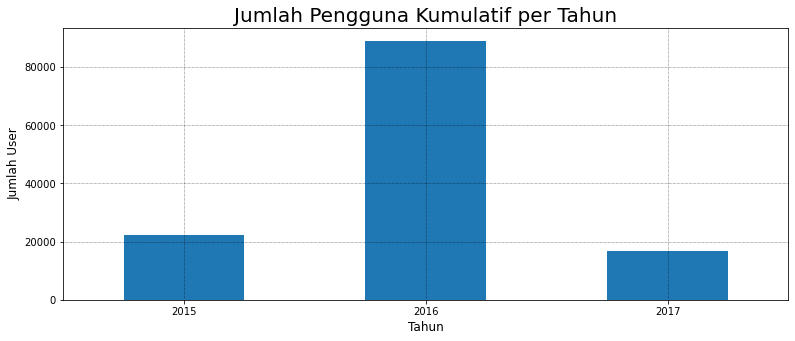

In [33]:
plt.figure(figsize=(13,5))
new_data.groupby('year')['year'].count().plot(kind='bar')
plt.title('Jumlah Pengguna Kumulatif per Tahun', fontsize=20)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah User', fontsize=12)
plt.xticks(rotation=0)
plt.grid(linestyle=':',color='black',linewidth=0.5)
plt.show()

##### 2. Proporsi Ratio Subscriber dengan One-Time User

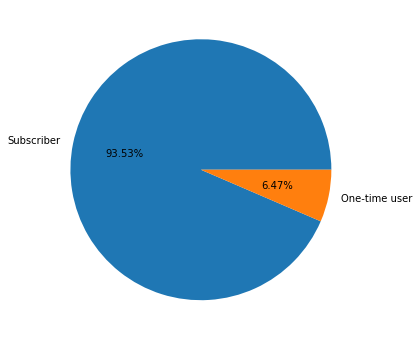

In [34]:
plt.figure(figsize=(8,6))
plt.pie(new_data['User Type'].value_counts(), labels=new_data['User Type'].unique(), autopct='%1.2f%%')
plt.show()

##### 3a. Station dengan titik awal paling banyak dan paling sedikit peminatnya

In [35]:
start = new_data['Start Station Name'].value_counts()
start.head(10)

Grove St PATH       14986
Exchange Place       9895
Sip Ave              8699
Hamilton Park        8218
Newport PATH         7082
Brunswick St         5042
Newark Ave           4904
Essex Light Rail     4850
Van Vorst Park       4684
Newport Pkwy         4578
Name: Start Station Name, dtype: int64

In [36]:
start.tail(10)

Leonard Gordon Park        240
Astor Place                203
West Side Light Rail       186
Union St                   184
Bayside Park               162
MLK Light Rail             122
Columbia Park              121
Communipaw & Berry Lane     50
Danforth Light Rail         38
Bethune Center              18
Name: Start Station Name, dtype: int64

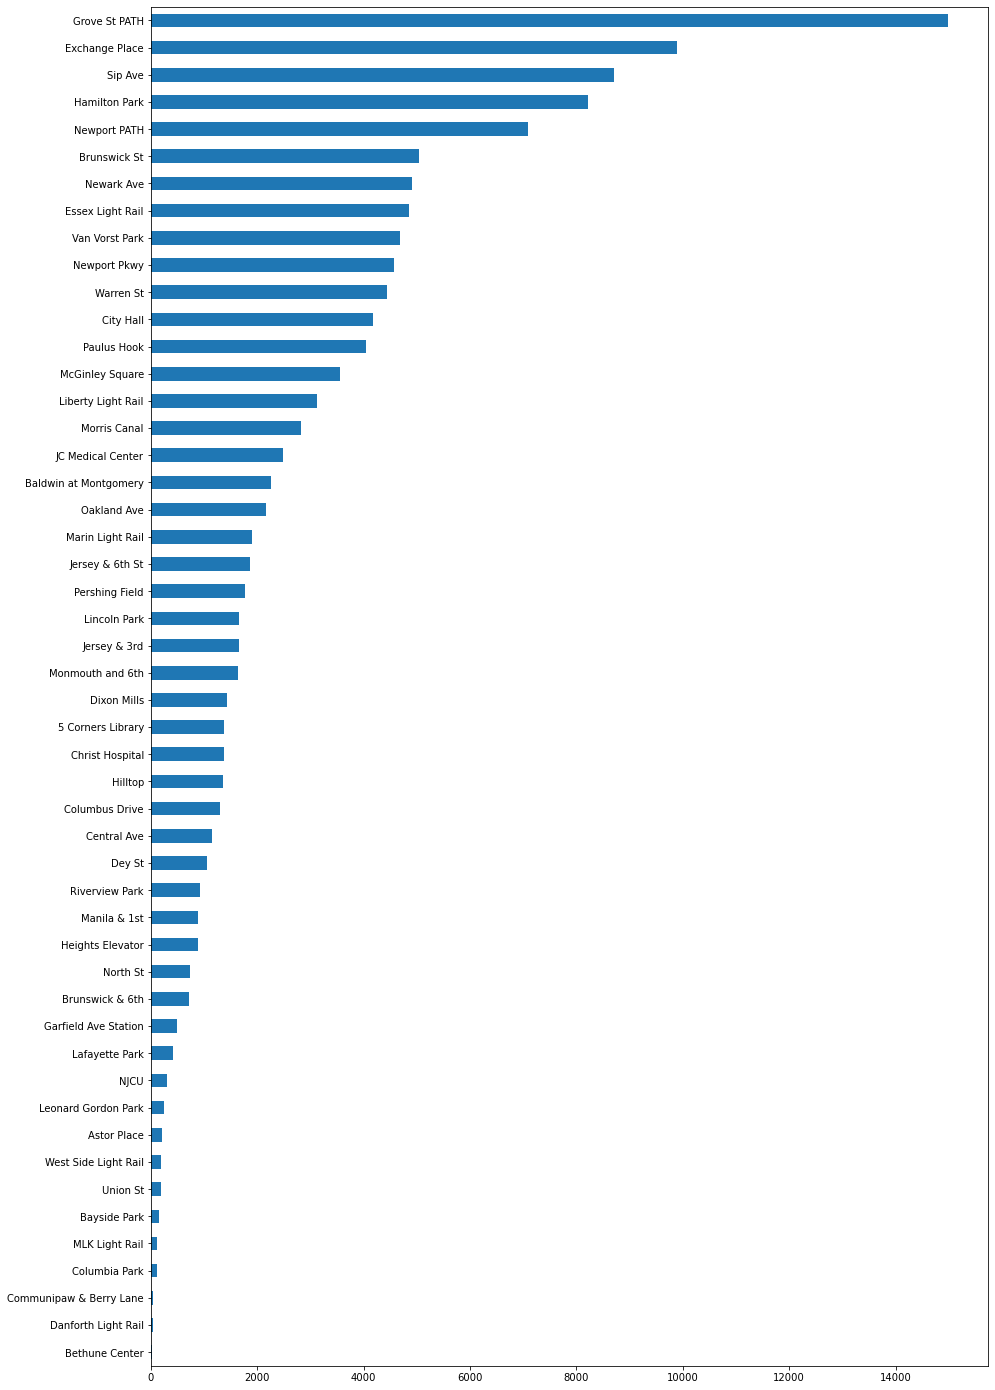

In [37]:
plt.figure(figsize=(15,25))
new_data['Start Station Name'].value_counts().sort_values().plot(kind='barh')
plt.show()

##### 3b. Station dengan titik akhir paling banyak dan paling sedikit peminatnya

In [38]:
end = new_data['End Station Name'].value_counts()
end.head(10)

Grove St PATH       19792
Exchange Place      11253
Hamilton Park        8306
Sip Ave              8139
Newport PATH         7001
Essex Light Rail     5246
Newport Pkwy         4595
Warren St            4443
Newark Ave           4389
Brunswick St         4358
Name: End Station Name, dtype: int64

In [39]:
end.tail(10)

W 52 St & 5 Ave                  1
E 47 St & Park Ave               1
Roebling St & N 4 St             1
Murray St & West St              1
MacDougal St & Washington Sq     1
Riverside Dr & W 104 St          1
West Thames St                   1
Christopher St & Greenwich St    1
E 2 St & 2 Ave E                 1
Water - Whitehall Plaza          1
Name: End Station Name, dtype: int64

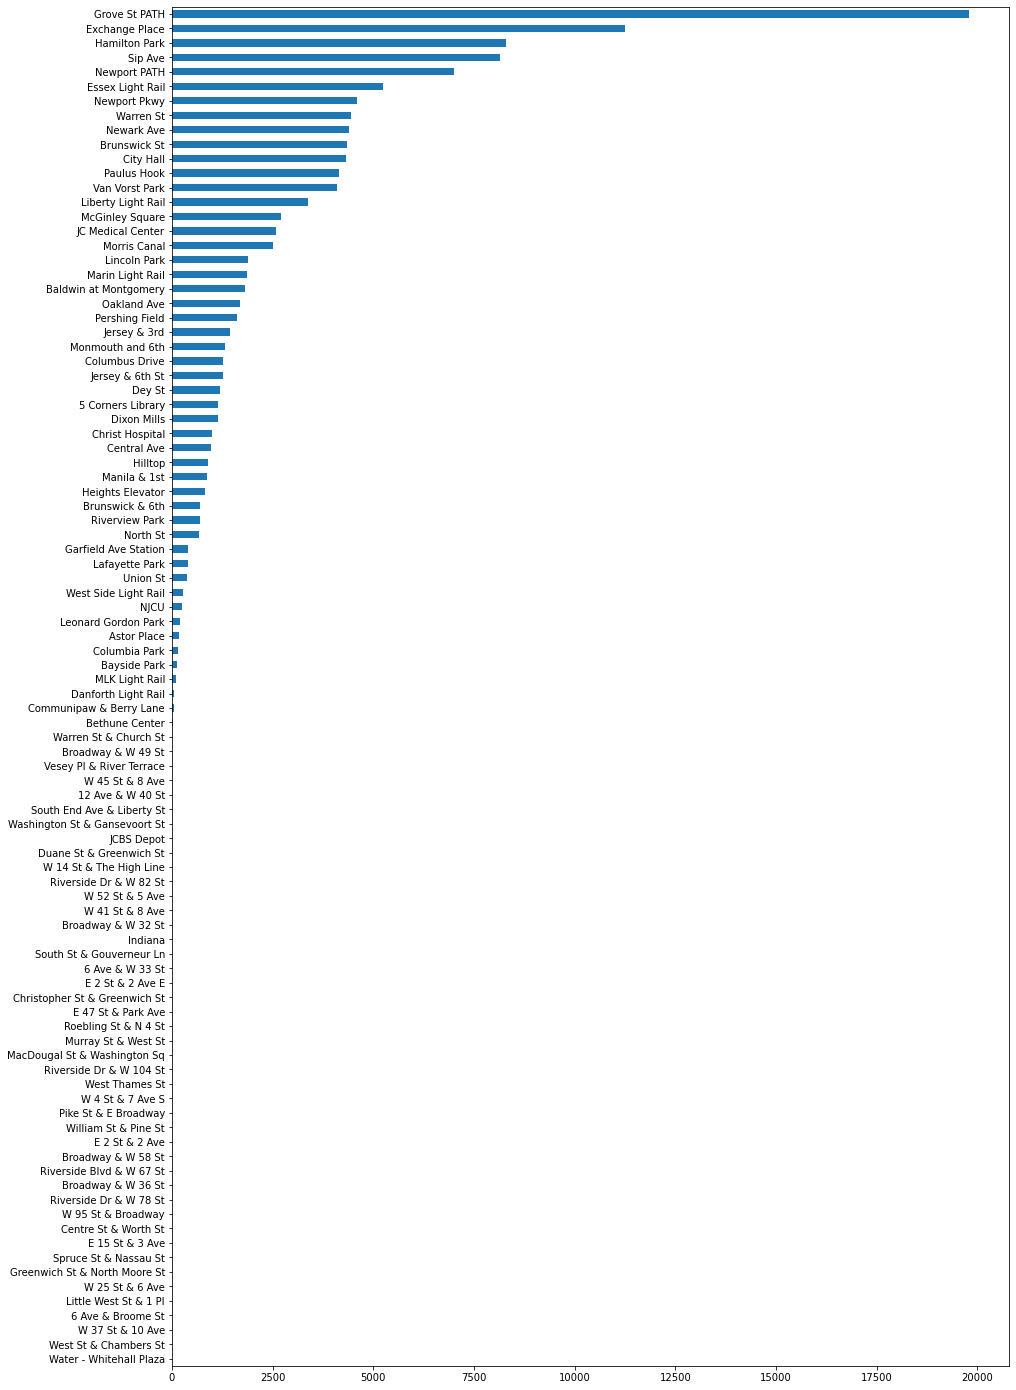

In [40]:
plt.figure(figsize=(15,25))
new_data['End Station Name'].value_counts().sort_values().plot(kind='barh')
plt.show()